In [1]:
from datetime import datetime
import math
import numpy as np
import pandas as pd
from pathlib import Path
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeCV
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load Dataset

In [2]:
df = pd.read_csv('CS3244_parsed_data3.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y")
df.head(30)

,name,date,open,close,range,high,low,avg,vol,avg7,...,range30,vol30,dir30,tend30,RSI,stosc,MACD,dirNext1,dirNext7,dirNext30
0,spy,2005-04-11,103.040,102.890,0.150,103.16,102.650,102.9050,52639928,102.965000,...,6.110,2114024454,0,0.144773,53.846154,61.832061,-1.092853,1,-1,0
1,spy,2005-04-12,102.700,103.410,0.710,103.72,101.980,102.8500,99373733,102.978571,...,6.110,2133702843,0,0.145209,53.846154,81.679389,-0.911603,-1,-1,0
2,spy,2005-04-13,103.280,102.180,1.100,103.50,102.040,102.7700,75829826,103.062143,...,6.110,2154925257,0,0.142220,46.153846,34.732824,-0.723910,-1,-1,0
3,spy,2005-04-14,102.310,100.860,1.450,102.37,100.860,101.6150,114379408,102.890000,...,6.520,2195571575,0,0.144655,38.461538,0.000000,-0.557468,-1,-1,0
4,spy,2005-04-15,100.830,99.439,1.391,101.22,99.399,100.3095,153892870,102.464214,...,7.981,2278177622,0,0.153609,38.461538,0.890670,-0.510567,1,0,1
5,spy,2005-04-18,99.419,99.750,0.331,100.15,99.269,99.7095,115154806,101.926286,...,8.111,2328848804,0,0.157978,30.769231,10.409002,-0.561647,0,0,1
6,spy,2005-04-19,100.270,100.550,0.280,100.80,100.040,100.4200,78518182,101.511286,...,7.881,2357078972,0,0.151649,30.769231,27.721272,-0.566615,-1,0,1
7,spy,2005-04-20,100.540,99.120,1.420,100.73,98.916,99.8230,131823084,101.071000,...,7.604,2437627083,0,0.147933,30.769231,4.101327,-0.557795,1,-1,1
8,spy,2005-04-21,100.000,101.060,1.060,101.23,99.640,100.4350,100403045,100.726000,...,7.124,2453539015,0,0.142735,38.461538,43.104142,-0.572891,0,0,1
9,spy,2005-04-22,100.830,100.680,0.150,101.48,99.550,100.5150,103125842,100.403857,...,7.124,2481702609,0,0.138568,38.461538,35.464415,-0.669526,1,0,1


In [3]:
df_spy = df.loc[(df['name']=='spy')]
df_spy = df_spy.set_index(df_spy['date'])
df_spy = df_spy.sort_index()
df_spy = pd.concat([df_spy['2005-04-08':'2008-01-01'], df_spy['2009-01-01':]])
df_spy

,name,date,open,close,range,high,low,avg,vol,avg7,...,range30,vol30,dir30,tend30,RSI,stosc,MACD,dirNext1,dirNext7,dirNext30
date,,,,,,,,,,,,,,,,,,,,,
2005-04-11,spy,2005-04-11,103.04,102.890,0.150,103.160,102.650,102.9050,52639928,102.965000,...,6.110,2114024454,0,0.144773,53.846154,61.832061,-1.092853,1,-1,0
2005-04-12,spy,2005-04-12,102.70,103.410,0.710,103.720,101.980,102.8500,99373733,102.978571,...,6.110,2133702843,0,0.145209,53.846154,81.679389,-0.911603,-1,-1,0
2005-04-13,spy,2005-04-13,103.28,102.180,1.100,103.500,102.040,102.7700,75829826,103.062143,...,6.110,2154925257,0,0.142220,46.153846,34.732824,-0.723910,-1,-1,0
2005-04-14,spy,2005-04-14,102.31,100.860,1.450,102.370,100.860,101.6150,114379408,102.890000,...,6.520,2195571575,0,0.144655,38.461538,0.000000,-0.557468,-1,-1,0
2005-04-15,spy,2005-04-15,100.83,99.439,1.391,101.220,99.399,100.3095,153892870,102.464214,...,7.981,2278177622,0,0.153609,38.461538,0.890670,-0.510567,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-25,spy,2017-09-25,249.15,248.930,0.220,249.553,248.080,248.8165,56898067,249.392000,...,9.550,2020273126,1,-0.250943,69.230769,75.628627,2.514859,-1,1,1
2017-09-26,spy,2017-09-26,249.42,249.080,0.340,249.700,248.805,249.2525,54026655,249.438071,...,9.550,2000869931,1,-0.264310,69.230769,78.235294,2.549458,0,1,1
2017-09-27,spy,2017-09-27,249.88,250.050,0.170,250.490,248.870,249.6800,80743646,249.435214,...,9.850,2026289199,1,-0.281353,76.923077,91.851852,2.415003,1,1,1


# Data Visualization

array([[<AxesSubplot:xlabel='open', ylabel='open'>,
        <AxesSubplot:xlabel='close', ylabel='open'>,
        <AxesSubplot:xlabel='range', ylabel='open'>,
        <AxesSubplot:xlabel='high', ylabel='open'>,
        <AxesSubplot:xlabel='low', ylabel='open'>,
        <AxesSubplot:xlabel='avg', ylabel='open'>,
        <AxesSubplot:xlabel='vol', ylabel='open'>,
        <AxesSubplot:xlabel='avg7', ylabel='open'>,
        <AxesSubplot:xlabel='sd7', ylabel='open'>,
        <AxesSubplot:xlabel='range7', ylabel='open'>,
        <AxesSubplot:xlabel='vol7', ylabel='open'>,
        <AxesSubplot:xlabel='dir7', ylabel='open'>,
        <AxesSubplot:xlabel='tend7', ylabel='open'>,
        <AxesSubplot:xlabel='avg30', ylabel='open'>,
        <AxesSubplot:xlabel='sd30', ylabel='open'>,
        <AxesSubplot:xlabel='range30', ylabel='open'>,
        <AxesSubplot:xlabel='vol30', ylabel='open'>,
        <AxesSubplot:xlabel='dir30', ylabel='open'>,
        <AxesSubplot:xlabel='tend30', ylabel='open'>,
   

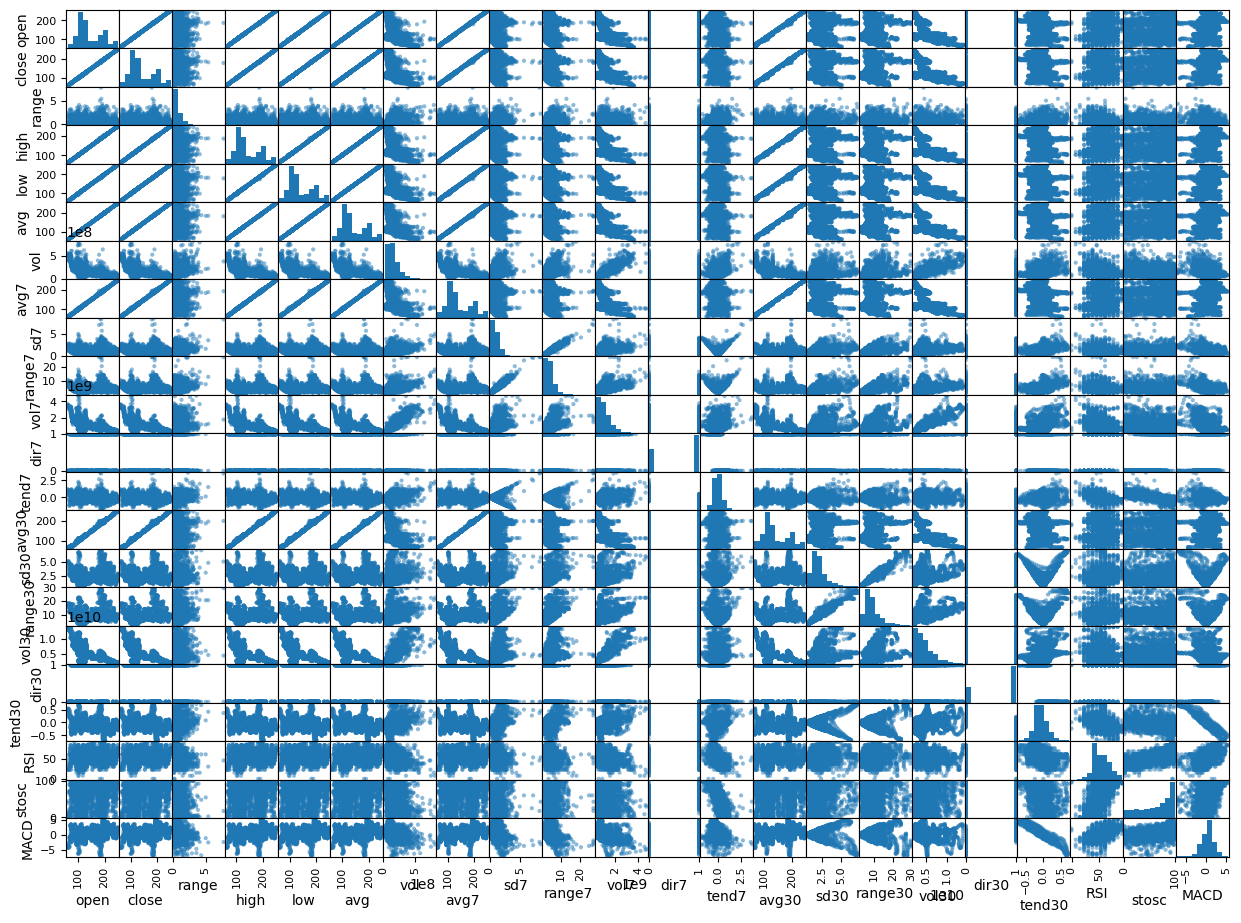

In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_spy.iloc[:,0:24], figsize=(15,11))

<Figure size 640x480 with 0 Axes>

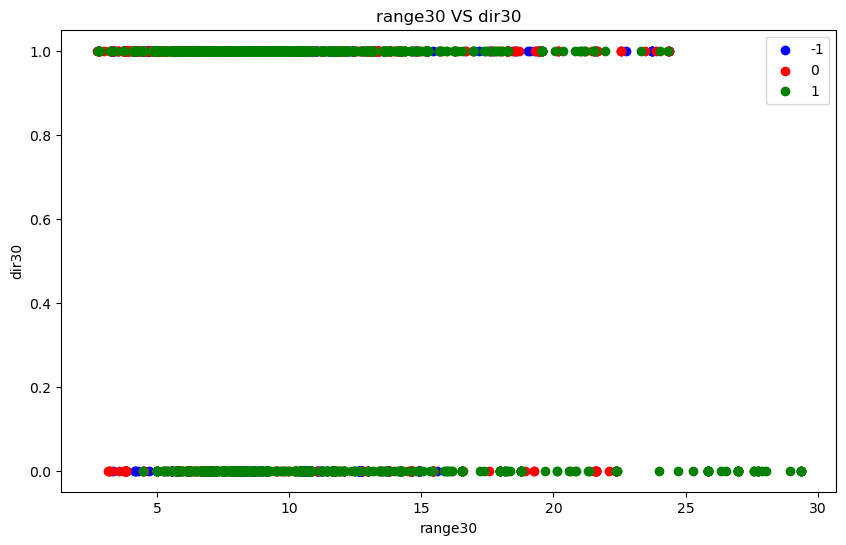

In [5]:
plt.clf()
plt.figure(figsize=(10,6))
names = ['-1', '0', '1']
colors = ['b','r','g']
label = df_spy.dirNext30
plt.title('range30 VS dir30')
plt.xlabel('range30')
plt.ylabel('dir30')
for i in range(len(names)):
    bucket = df_spy[df_spy['dirNext30'] == i-1]
    bucket = bucket.iloc[:,[17,19]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i], c=colors[i]) 
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

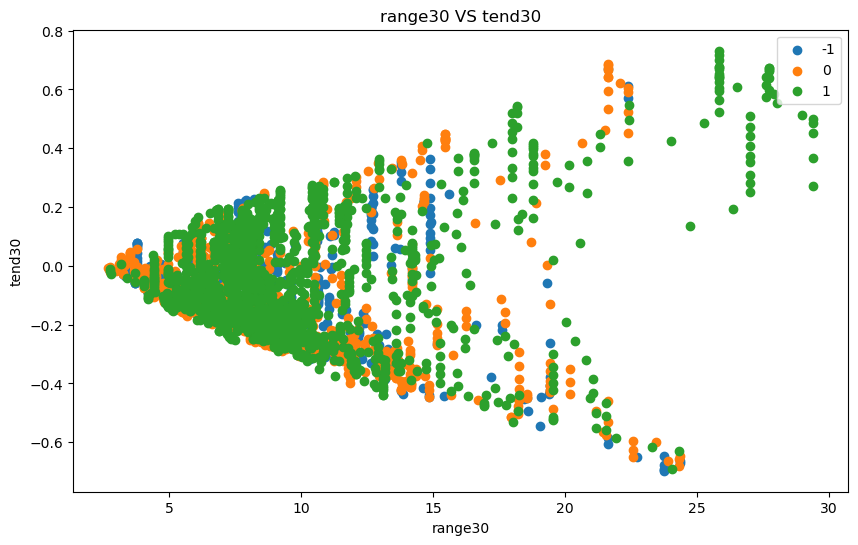

In [6]:
plt.clf()
plt.figure(figsize=(10,6))
names = [-1, 0, 1]
colors = ['b','r','g']
label = df_spy.dirNext30
plt.title('range30 VS tend30')
plt.xlabel('range30')
plt.ylabel('tend30')
for i in range(len(names)):
    bucket = df_spy[df_spy['dirNext30'] == i-1]
    bucket = bucket.iloc[:,[17,20]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i]) 
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

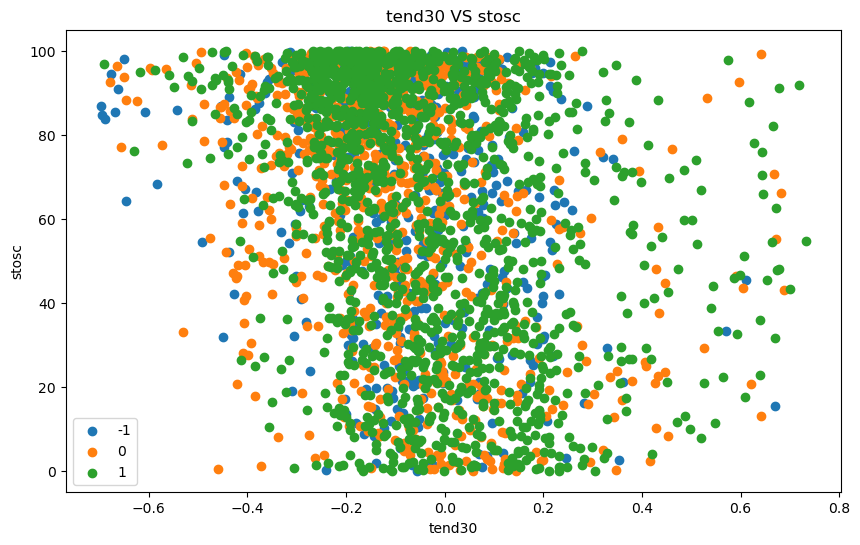

In [7]:
plt.clf()
plt.figure(figsize=(10,6))
names = [-1, 0, 1]
colors = ['b','r','g']
label = df_spy.dirNext30
plt.title('tend30 VS stosc')
plt.xlabel('tend30')
plt.ylabel('stosc')
for i in range(len(names)):
    bucket = df_spy[df_spy['dirNext30'] == i-1]
    bucket = bucket.iloc[:,[20,22]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i]) 
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

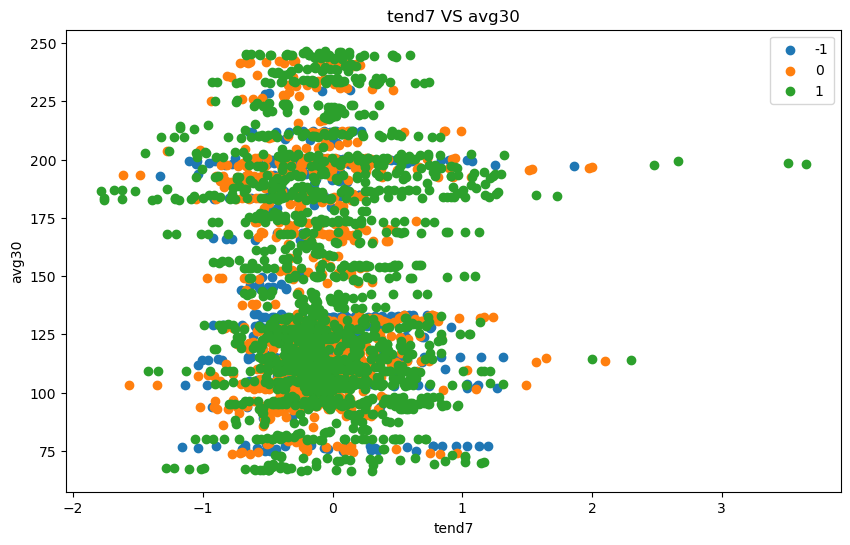

In [8]:
plt.clf()
plt.figure(figsize=(10,6))
names = [-1, 0, 1]
colors = ['b','r','g']
label = df_spy.dirNext30
plt.title('tend7 VS avg30')
plt.xlabel('tend7')
plt.ylabel('avg30')
for i in range(len(names)):
    bucket = df_spy[df_spy['dirNext30'] == i-1]
    bucket = bucket.iloc[:,[14,15]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i]) 
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

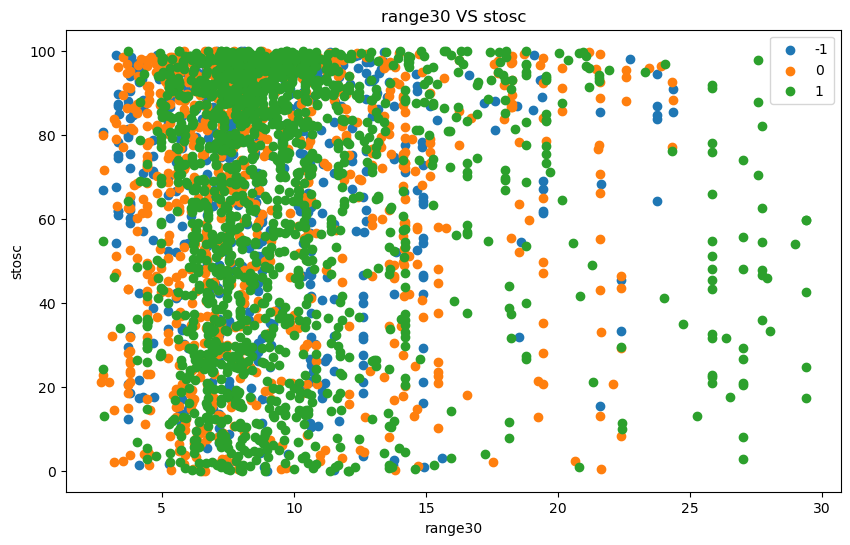

In [9]:
plt.clf()
plt.figure(figsize=(10,6))
names = [-1, 0, 1]
colors = ['b','r','g']
label = df_spy.dirNext30
plt.title('range30 VS stosc')
plt.xlabel('range30')
plt.ylabel('stosc')
for i in range(len(names)):
    bucket = df_spy[df_spy['dirNext30'] == i-1]
    bucket = bucket.iloc[:,[17,22]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i]) 
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

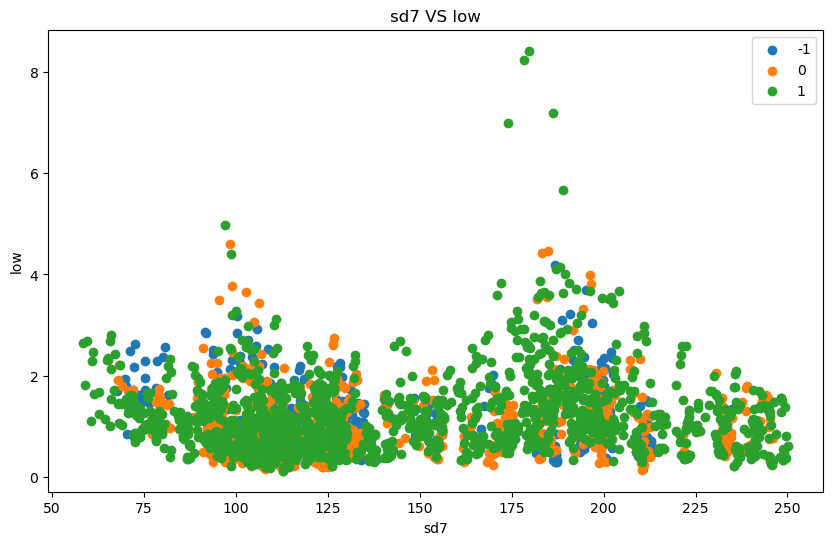

In [10]:
plt.clf()
plt.figure(figsize=(10,6))
names = [-1, 0, 1]
colors = ['b','r','g']
label = df_spy.dirNext30
plt.title('sd7 VS low')
plt.xlabel('sd7')
plt.ylabel('low')
for i in range(len(names)):
    bucket = df_spy[df_spy['dirNext30'] == i-1]
    bucket = bucket.iloc[:,[6,10]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i]) 
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

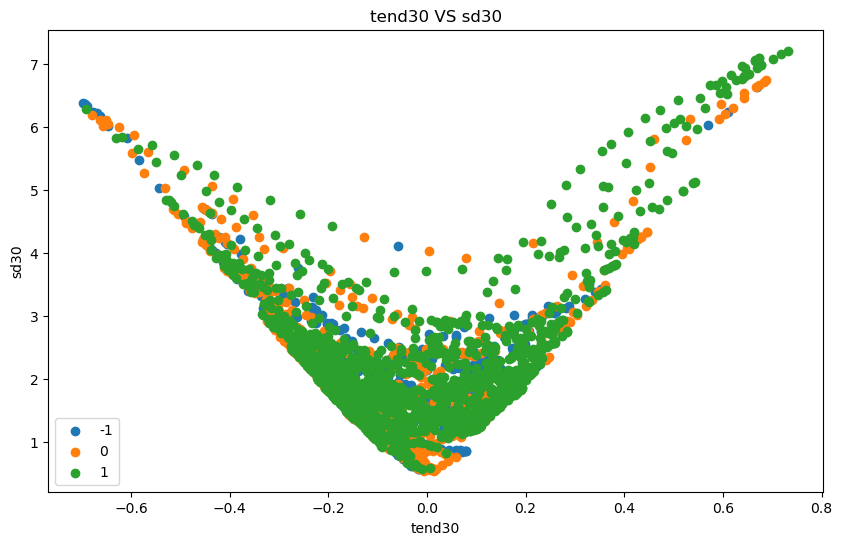

In [11]:
plt.clf()
plt.figure(figsize=(10,6))
names = [-1, 0, 1]
colors = ['b','r','g']
label = df_spy.dirNext30
plt.title('tend30 VS sd30')
plt.xlabel('tend30')
plt.ylabel('sd30')
for i in range(len(names)):
    bucket = df_spy[df_spy['dirNext30'] == i-1]
    bucket = bucket.iloc[:,[20,16]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i]) 
plt.legend()
plt.show()

# Check Linear Separability using SVM

In [12]:
from sklearn import metrics, svm

def check_svm(df):
    C_test = [1, 0.8, 0.5, 0.3, 0.1, 0.05, 0.01]
    features = ['open', 'close', 'range', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'tend30', 'RSI', 'stosc', 'MACD']
    df = df.loc[(df['name']=='spy')]
    df = df.set_index(df['date'])
    df = df.sort_index()
    
    train = pd.concat([df['2005-04-08':'2008-01-01'], df['2009-01-01':'2012-01-01'], df['2013-01-01':'2016-01-01']])
    test  = pd.concat([df['2012-01-01':'2013-01-01'], df['2017-01-01':]])
    
    X_train = train[features] # Features
    y_train = train.dirNext30 + 1 # Target variable
    X_test = test[features] # Features
    y_test = test.dirNext30 + 1 # Target variable

    accuracies_train = []
    accuracies_test = []
    for c in C_test:
        print("c test:", c)
        clf = svm.SVC(decision_function_shape='ovo', C=c)
        clf.fit(X_train, y_train)
        y_pred_test = clf.predict(X_test) #2D Array
        print("Accuracy on test results:",metrics.accuracy_score(y_test, y_pred_test))
        accuracies_test.append(metrics.accuracy_score(y_test, y_pred_test))
        y_pred_train = clf.predict(X_train) #2D Array
        print("Accuracy on train results:",metrics.accuracy_score(y_train, y_pred_train))
        accuracies_train.append(metrics.accuracy_score(y_train, y_pred_train))
    return accuracies_test, accuracies_train
        

In [13]:
accuracies_test, accuracies_train = check_svm(df)

c test: 1
Accuracy on test results: 0.4269406392694064
Accuracy on train results: 0.5186533212010919
c test: 0.8
Accuracy on test results: 0.4269406392694064
Accuracy on train results: 0.5186533212010919
c test: 0.5
Accuracy on test results: 0.4269406392694064
Accuracy on train results: 0.5145586897179254
c test: 0.3
Accuracy on test results: 0.5342465753424658
Accuracy on train results: 0.521383075523203
c test: 0.1
Accuracy on test results: 0.6461187214611872
Accuracy on train results: 0.48316651501364877
c test: 0.05
Accuracy on test results: 0.6461187214611872
Accuracy on train results: 0.48316651501364877
c test: 0.01
Accuracy on test results: 0.6461187214611872
Accuracy on train results: 0.48316651501364877


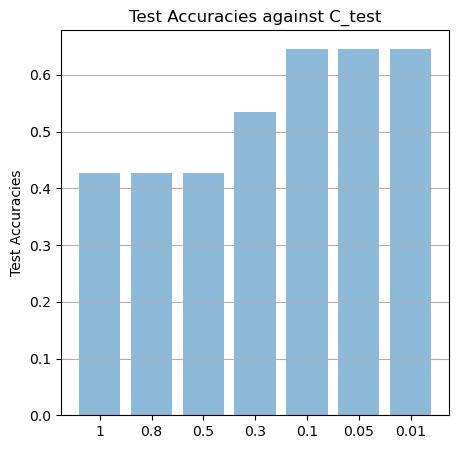

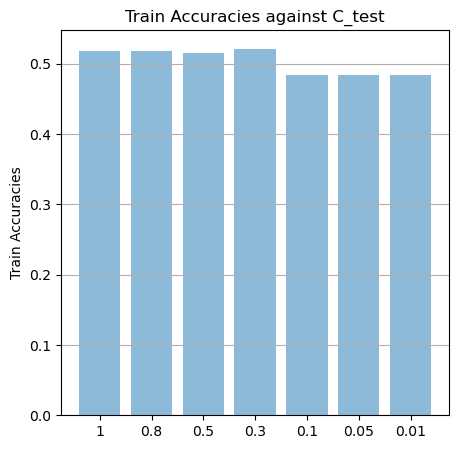

In [14]:
# Create arrays for the plot
C_test = [1, 0.8, 0.5, 0.3, 0.1, 0.05, 0.01]
x_pos = np.arange(7)

fig, ax = plt.subplots(figsize=(5, 5))

ax.bar(x_pos, accuracies_test, align='center', alpha=0.5)
ax.set_ylabel('Test Accuracies')
ax.set_xticks(x_pos)
ax.set_xticklabels(C_test)
ax.set_title('Test Accuracies against C_test')
ax.yaxis.grid(True)

fig, ax = plt.subplots(figsize=(5, 5))

ax.bar(x_pos, accuracies_train, align='center', alpha=0.5)
ax.set_ylabel('Train Accuracies')
ax.set_xticks(x_pos)
ax.set_xticklabels(C_test)
ax.set_title('Train Accuracies against C_test')
ax.yaxis.grid(True)

# Logistic Regression Model

## Final Implementation

In [15]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [16]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [17]:
#All etfs, removed 2008 outliers
def logreg_predict_dir7(df, n):
    start = time.time()
    df = df.set_index(df['date'])
    df = df.sort_index()
    
    #feature selection
    if (n == 22) :
        features = ['open', 'close', 'range', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'tend30', 'RSI', 'stosc', 'MACD']
    elif (n == 21) :
        features = ['open', 'close', 'range', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc', 'MACD']
    elif (n == 20):
        features = ['open', 'close', 'range', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc', 'MACD']
    elif (n == 19):
        features = ['open', 'close', 'range', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 18):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 17):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 16):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 15):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'avg30', 'sd30', 'range30', 'vol30', 'RSI', 'stosc']
    elif (n == 14):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'avg30', 'range30', 'vol30', 'RSI', 'stosc']
    elif (n == 13):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'avg30', 'range30', 'vol30', 'RSI', 'stosc']
    elif (n == 12):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'avg30', 'vol30', 'RSI', 'stosc']
    elif (n == 11):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'avg30', 'vol30', 'stosc']
    elif (n == 10):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'avg30', 'vol30']
    elif (n == 9):
        features = ['open', 'close', 'high', 'avg', 'vol', 'avg7', 'vol7', 'avg30', 'vol30']
    elif (n == 8):
        features = ['close', 'high', 'avg', 'vol', 'avg7', 'vol7', 'avg30', 'vol30']
    elif (n == 7):
        features = ['close', 'high', 'vol', 'avg7', 'vol7', 'avg30', 'vol30']
    elif (n == 6):
        features = ['close', 'high', 'vol', 'vol7', 'avg30', 'vol30']
    elif (n == 5):
        features = ['high', 'vol', 'vol7', 'avg30', 'vol30']
    elif (n == 4):
        features = ['high', 'vol', 'vol7', 'vol30']
    elif (n == 3):
        features = ['vol', 'vol7', 'vol30']
    elif (n == 2):
        features = ['vol', 'vol7']
    elif (n == 1):
        features = ['vol']
    
    #2005-2007, 2009-2011, 2013-2016
    train = pd.concat([df['2005-04-08':'2008-01-01'], df['2009-01-01':'2012-01-01'], df['2013-01-01':'2016-01-01']])
    #2012, 2017
    test  = pd.concat([df['2012-01-01':'2013-01-01'], df['2017-01-01':]])
    X_train = train[features] # Features
    y_train = train.dirNext30 + 1 # Target variable
    X_test = test[features] # Features
    y_test = test.dirNext30 + 1 # Target variable
    
    # define the multinomial logistic regression model
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    # define the model evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the scores
    n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    # report the model performance
    print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    model.fit(X_train, y_train)
    end = time.time()
    print(end - start, "seconds")
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    accuracy = model.score(X_test, y_test)
    coef = model.coef_
    selector = RFE(model, n_features_to_select=n-1, step=1)
    selector = selector.fit(X_train, y_train)
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
    
    return y_test, y_pred, y_pred_proba, accuracy, coef, selector


## Working Process

## By each etf, Normalized, Feature Selection, Removed 2008 data (outlier)

In [18]:
#By each etf, with normalization
def logreg_predict_dir1(df, etf, n):
    df = df.loc[(df['name']==etf)]
    df = df.set_index(df['date'])
    df = df.sort_index()
    
    #feature selection
    if (n == 22) :
        features = ['open', 'close', 'range', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'tend30', 'RSI', 'stosc', 'MACD']
    elif (n == 21) :
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'tend30', 'RSI', 'stosc', 'MACD']
    elif (n == 20):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc', 'MACD']
    elif (n == 19):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc', 'MACD']
    elif (n == 18):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 17):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 16):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'dir7', 'avg30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 15):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'avg30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 14):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'avg30', 'range30', 'vol30', 'RSI', 'stosc']
    elif (n == 13):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'avg30', 'range30', 'vol30', 'RSI', 'stosc']
    elif (n == 12):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'avg30', 'vol30', 'RSI', 'stosc']
    elif (n == 11):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 10):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 9):
        features = ['open', 'close', 'high', 'avg', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 8):
        features = ['open', 'close', 'high', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 7):
        features = ['close', 'high', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 6):
        features = ['high', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 5):
        features = ['vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 4):
        features = ['vol', 'vol7', 'vol30', 'stosc']
    elif (n == 3):
        features = ['vol', 'vol7', 'vol30']
    elif (n == 2):
        features = ['vol', 'vol30']
    elif (n == 1):
        features = ['vol']
    
    #2005-2007, 2009-2011, 2013-2016
    train = pd.concat([df['2005-04-08':'2008-01-01'], df['2009-01-01':'2012-01-01'], df['2013-01-01':'2016-01-01']])
    #2008, 2012, 2017
    test  = pd.concat([df['2008-01-01':'2009-01-01'],df['2012-01-01':'2013-01-01'], df['2017-01-01':]])
    
    X_train = preprocessing.normalize(train[features], norm='l2') # Features
    y_train = train.dirNext30 + 1 # Target variable
    X_test = preprocessing.normalize(test[features], norm='l2') # Features
    y_test = test.dirNext30 + 1 # Target variable

    # instantiate the model (using the default parameters)
    logreg = LogisticRegression(random_state=16)

    # fit the model with data
    logreg.fit(X_train, y_train)
    coef = list(logreg.coef_[0])

    y_pred = logreg.predict(X_test)
    accuracy = logreg.score(X_test, y_test)
    selector = RFE(logreg, n_features_to_select=n-1, step=1)
    selector = selector.fit(X_train, y_train)
    y_pred_proba = logreg.predict_proba(X_test)[::,1]
    plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues)
    
    return y_test, y_pred, y_pred_proba, accuracy, coef, selector


In [19]:
#By each etf, with normalization, removed 2008 outliers
def logreg_predict_dir2(df, etf, n):
    df = df.loc[(df['name']==etf)]
    df = df.set_index(df['date'])
    df = df.sort_index()
    
    #feature selection
    if (n == 22) :
        features = ['open', 'close', 'range', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'tend30', 'RSI', 'stosc', 'MACD']
    elif (n == 21) :
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'tend30', 'RSI', 'stosc', 'MACD']
    elif (n == 20):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc', 'MACD']
    elif (n == 19):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc', 'MACD']
    elif (n == 18):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 17):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 16):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'dir7', 'avg30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 15):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'avg30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 14):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'avg30', 'range30', 'vol30', 'RSI', 'stosc']
    elif (n == 13):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'avg30', 'range30', 'vol30', 'RSI', 'stosc']
    elif (n == 12):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'avg30', 'vol30', 'RSI', 'stosc']
    elif (n == 11):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 10):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 9):
        features = ['open', 'close', 'high', 'avg', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 8):
        features = ['open', 'close', 'high', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 7):
        features = ['close', 'high', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 6):
        features = ['high', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 5):
        features = ['vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 4):
        features = ['vol', 'vol7', 'vol30', 'stosc']
    elif (n == 3):
        features = ['vol', 'vol7', 'vol30']
    elif (n == 2):
        features = ['vol', 'vol30']
    elif (n == 1):
        features = ['vol']
    
    #2005-2007, 2009-2011, 2013-2016
    train = pd.concat([df['2005-04-08':'2008-01-01'], df['2009-01-01':'2012-01-01'], df['2013-01-01':'2016-01-01']])
    #2012, 2017
    test  = pd.concat([df['2012-01-01':'2013-01-01'], df['2017-01-01':]])
    
    X_train = preprocessing.normalize(train[features], norm='l2') # Features
    y_train = train.dirNext30 + 1 # Target variable
    X_test = preprocessing.normalize(test[features], norm='l2') # Features
    y_test = test.dirNext30 + 1 # Target variable

    # instantiate the model (using the default parameters)
    logreg = LogisticRegression(random_state=16)

    # fit the model with data
    logreg.fit(X_train, y_train)
    coef = list(logreg.coef_[0])

    y_pred = logreg.predict(X_test)
    accuracy = logreg.score(X_test, y_test)
    selector = RFE(logreg, n_features_to_select=n-1, step=1)
    selector = selector.fit(X_train, y_train)
    y_pred_proba = logreg.predict_proba(X_test)[::,1]
    plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues)
    
    return y_test, y_pred, y_pred_proba, accuracy, coef, selector


In [20]:
#By each etf, with normalization, removed 2008 outliers, oversampling
def logreg_predict_dir3(df, etf, n):
    df = df.loc[(df['name']==etf)]
    df = df.set_index(df['date'])
    df = df.sort_index()
    
    #feature selection
    if (n == 22) :
        features = ['open', 'close', 'range', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'tend30', 'RSI', 'stosc', 'MACD']
    elif (n == 21) :
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'tend30', 'RSI', 'stosc', 'MACD']
    elif (n == 20):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc', 'MACD']
    elif (n == 19):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc', 'MACD']
    elif (n == 18):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 17):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 16):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'dir7', 'avg30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 15):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'avg30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 14):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'avg30', 'range30', 'vol30', 'RSI', 'stosc']
    elif (n == 13):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'avg30', 'range30', 'vol30', 'RSI', 'stosc']
    elif (n == 12):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'avg30', 'vol30', 'RSI', 'stosc']
    elif (n == 11):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 10):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 9):
        features = ['open', 'close', 'high', 'avg', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 8):
        features = ['open', 'close', 'high', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 7):
        features = ['close', 'high', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 6):
        features = ['high', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 5):
        features = ['vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 4):
        features = ['vol', 'vol7', 'vol30', 'stosc']
    elif (n == 3):
        features = ['vol', 'vol7', 'vol30']
    elif (n == 2):
        features = ['vol', 'vol30']
    elif (n == 1):
        features = ['vol']
    
    train = pd.concat([df['2005-04-08':'2008-01-01'], df['2009-01-01':'2012-01-01'], df['2013-01-01':'2016-01-01']])
    print('train set dirNext30 -1: ', sum(list(train.dirNext30 == -1)))
    print('train set dirNext30 0: ', sum(list(train.dirNext30 == 0)))
    print('train set dirNext30 1: ', sum(list(train.dirNext30 == 1)))
    
    #Oversampling
    negclass = train.loc[train.dirNext30 == -1]
    negclass = negclass.sample(n = 638, replace=True)
    zeroclass = train.loc[train.dirNext30 == 0]
    zeroclass = zeroclass.sample(n = 350, replace=True)
    train = pd.concat([train, negclass, zeroclass])
    
    print('train set dirNext30 -1 after oversampling: ', sum(list(train.dirNext30 == -1)))
    print('train set dirNext30 0 after oversampling: ', sum(list(train.dirNext30 == 0)))
    print('train set dirNext30 1 after oversampling: ', sum(list(train.dirNext30 == 1)))
    
    test  = pd.concat([df['2008-01-01':'2009-01-01'],df['2012-01-01':'2013-01-01'], df['2017-01-01':]])
    
    train = pd.concat([df['2005-04-08':'2015-01-01']])
    test  = pd.concat([df['2015-01-01':]])
    print('test set dirNext30 -1: ', sum(list(test.dirNext30 == -1)))
    print('test set dirNext30 0: ', sum(list(test.dirNext30 == 0)))
    print('test set dirNext30 1: ', sum(list(test.dirNext30 == 1)))
    #Oversampling
    negclass_test = test.loc[test.dirNext30 == -1]
    negclass_test = negclass_test.sample(n = 285, replace=True)
    zeroclass_test = test.loc[test.dirNext30 == 0]
    zeroclass_test = zeroclass_test.sample(n = 211, replace=True)
    test = pd.concat([test, negclass_test, zeroclass_test])
    print('test set dirNext30 -1 after oversampling: ', sum(list(test.dirNext30 == -1)))
    print('test set dirNext30 0 after oversampling: ', sum(list(test.dirNext30 == 0)))
    print('test set dirNext30 1 after oversampling: ', sum(list(test.dirNext30 == 1)))
    
    X_train = preprocessing.normalize(train[features], norm='l2') # Features
    y_train = train.dirNext30 + 1 # Target variable
    X_test = preprocessing.normalize(test[features], norm='l2') # Features
    y_test = test.dirNext30 + 1 # Target variable

    # instantiate the model (using the default parameters)
    logreg = LogisticRegression(random_state=16)

    # fit the model with data
    logreg.fit(X_train, y_train)
    coef = list(logreg.coef_[0])

    y_pred = logreg.predict(X_test)
    accuracy = logreg.score(X_test, y_test)
    selector = RFE(logreg, n_features_to_select=n-1, step=1)
    selector = selector.fit(X_train, y_train)
    y_pred_proba = logreg.predict_proba(X_test)[::,1]
    plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues)
    
    return y_test, y_pred, y_pred_proba, accuracy, coef, selector


In [21]:
#By each etf, with normalization, removed 2008 outliers, dirNext7
def logreg_predict_dir4(df, etf, n):
    df = df.loc[(df['name']==etf)]
    df = df.set_index(df['date'])
    df = df.sort_index()
    
    #feature selection
    if (n == 22) :
        features = ['open', 'close', 'range', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'tend30', 'RSI', 'stosc', 'MACD']
    elif (n == 21) :
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'tend30', 'RSI', 'stosc', 'MACD']
    elif (n == 20):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc', 'MACD']
    elif (n == 19):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc', 'MACD']
    elif (n == 18):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 17):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 16):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'dir7', 'avg30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 15):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'avg30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 14):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'avg30', 'range30', 'vol30', 'RSI', 'stosc']
    elif (n == 13):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'avg30', 'range30', 'vol30', 'RSI', 'stosc']
    elif (n == 12):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'avg30', 'vol30', 'RSI', 'stosc']
    elif (n == 11):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 10):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 9):
        features = ['open', 'close', 'high', 'avg', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 8):
        features = ['open', 'close', 'high', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 7):
        features = ['close', 'high', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 6):
        features = ['high', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 5):
        features = ['vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 4):
        features = ['vol', 'vol7', 'vol30', 'stosc']
    elif (n == 3):
        features = ['vol', 'vol7', 'vol30']
    elif (n == 2):
        features = ['vol', 'vol30']
    elif (n == 1):
        features = ['vol']
    
    #2005-2007, 2009-2011, 2013-2016
    train = pd.concat([df['2005-04-08':'2008-01-01'], df['2009-01-01':'2012-01-01'], df['2013-01-01':'2016-01-01']])
    #2012, 2017
    test  = pd.concat([df['2012-01-01':'2013-01-01'], df['2017-01-01':]])
    
    X_train = preprocessing.normalize(train[features], norm='l2') # Features
    y_train = train.dirNext7 + 1 # Target variable
    X_test = preprocessing.normalize(test[features], norm='l2') # Features
    y_test = test.dirNext7 + 1 # Target variable

    # instantiate the model (using the default parameters)
    logreg = LogisticRegression(random_state=16)

    # fit the model with data
    logreg.fit(X_train, y_train)
    coef = list(logreg.coef_[0])

    y_pred = logreg.predict(X_test)
    accuracy = logreg.score(X_test, y_test)
    selector = RFE(logreg, n_features_to_select=n-1, step=1)
    selector = selector.fit(X_train, y_train)
    y_pred_proba = logreg.predict_proba(X_test)[::,1]
    plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues)
    
    return y_test, y_pred, y_pred_proba, accuracy, coef, selector


In [22]:
#By each etf, with normalization, removed 2008 outliers
def logreg_predict_dir5(df, n):
#     df = df.loc[(df['name']==etf)]
    df = df.set_index(df['date'])
    df = df.sort_index()
    
    #feature selection
    if (n == 22) :
        features = ['open', 'close', 'range', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'tend30', 'RSI', 'stosc', 'MACD']
    elif (n == 21) :
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'tend30', 'RSI', 'stosc', 'MACD']
    elif (n == 20):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc', 'MACD']
    elif (n == 19):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc', 'MACD']
    elif (n == 18):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 17):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 16):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'dir7', 'avg30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 15):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'avg30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 14):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'avg30', 'range30', 'vol30', 'RSI', 'stosc']
    elif (n == 13):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'avg30', 'range30', 'vol30', 'RSI', 'stosc']
    elif (n == 12):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'avg30', 'vol30', 'RSI', 'stosc']
    elif (n == 11):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 10):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 9):
        features = ['open', 'close', 'high', 'avg', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 8):
        features = ['open', 'close', 'high', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 7):
        features = ['close', 'high', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 6):
        features = ['high', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 5):
        features = ['vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 4):
        features = ['vol', 'vol7', 'vol30', 'stosc']
    elif (n == 3):
        features = ['vol', 'vol7', 'vol30']
    elif (n == 2):
        features = ['vol', 'vol30']
    elif (n == 1):
        features = ['vol30']
    
    #2005-2007, 2009-2011, 2013-2016
    train = pd.concat([df['2005-04-08':'2008-01-01'], df['2009-01-01':'2012-01-01'], df['2013-01-01':'2016-01-01']])
    #2012, 2017
    test  = pd.concat([df['2012-01-01':'2013-01-01'], df['2017-01-01':]])
    
    X_train = preprocessing.normalize(train[features], norm='l2') # Features
    y_train = train.dirNext30 + 1 # Target variable
    X_test = preprocessing.normalize(test[features], norm='l2') # Features
    y_test = test.dirNext30 + 1 # Target variable

    # instantiate the model (using the default parameters)
    logreg = LogisticRegression(random_state=16)

    # fit the model with data
    logreg.fit(X_train, y_train)
    coef = list(logreg.coef_[0])

    y_pred = logreg.predict(X_test)
    y_proba = logreg.predict_proba(X_test)[:,1]
    accuracy = logreg.score(X_test, y_test)
#     selector = RFE(logreg, n_features_to_select=n-1, step=1)
#     selector = selector.fit(X_train, y_train)
    y_pred_proba = logreg.predict_proba(X_test)[::,1]
    plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues)
    
    return y_test, y_pred, y_pred_proba, accuracy, coef, selector, y_proba


## All etfs, Without Normalization

In [23]:
#All etfs, removed 2008 outliers, with oversampling
def logreg_predict_dir8(df, n):
    df = df.set_index(df['date'])
    df = df.sort_index()
    
    #feature selection
    if (n == 22) :
        features = ['open', 'close', 'range', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'tend30', 'RSI', 'stosc', 'MACD']
    elif (n == 21) :
        features = ['open', 'close', 'range', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc', 'MACD']
    elif (n == 20):
        features = ['open', 'close', 'range', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc', 'MACD']
    elif (n == 19):
        features = ['open', 'close', 'range', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 18):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 17):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'dir7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 16):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'dir7', 'avg30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 15):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'avg30', 'range30', 'vol30', 'dir30', 'RSI', 'stosc']
    elif (n == 14):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'range7', 'vol7', 'avg30', 'range30', 'vol30', 'RSI', 'stosc']
    elif (n == 13):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'avg30', 'range30', 'vol30', 'RSI', 'stosc']
    elif (n == 12):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'avg30', 'vol30', 'RSI', 'stosc']
    elif (n == 11):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'avg7', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 10):
        features = ['open', 'close', 'high', 'low', 'avg', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 9):
        features = ['open', 'close', 'high', 'avg', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 8):
        features = ['open', 'close', 'high', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 7):
        features = ['close', 'high', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 6):
        features = ['high', 'vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 5):
        features = ['vol', 'vol7', 'vol30', 'RSI', 'stosc']
    elif (n == 4):
        features = ['vol', 'vol7', 'vol30', 'stosc']
    elif (n == 3):
        features = ['vol', 'vol7', 'vol30']
    elif (n == 2):
        features = ['vol', 'vol30']
    elif (n == 1):
        features = ['vol']
    
    #2005-2007, 2009-2011, 2013-2016
    train = pd.concat([df['2005-04-08':'2008-01-01'], df['2009-01-01':'2012-01-01'], df['2013-01-01':'2016-01-01']])
    print('train set dirNext30 -1: ', sum(list(train.dirNext30 == -1)))
    print('train set dirNext30 0: ', sum(list(train.dirNext30 == 0)))
    print('train set dirNext30 1: ', sum(list(train.dirNext30 == 1)))
    #Oversampling
    negclass = train.loc[train.dirNext30 == -1]
    negclass = negclass.sample(n = 37127, replace=True)
    zeroclass = train.loc[train.dirNext30 == 0]
    zeroclass = zeroclass.sample(n = 23229, replace=True)
    train = pd.concat([train, negclass, zeroclass])
    print('train set dirNext30 -1 after oversampling: ', sum(list(train.dirNext30 == -1)))
    print('train set dirNext30 0 after oversampling: ', sum(list(train.dirNext30 == 0)))
    print('train set dirNext30 1 after oversampling: ', sum(list(train.dirNext30 == 1)))
    
    #2012, 2017
    test  = pd.concat([df['2012-01-01':'2013-01-01'], df['2017-01-01':]])
    print('test set dirNext30 -1: ', sum(list(test.dirNext30 == -1)))
    print('test set dirNext30 0: ', sum(list(test.dirNext30 == 0)))
    print('test set dirNext30 1: ', sum(list(test.dirNext30 == 1)))
    #Oversampling
    negclass_test = test.loc[test.dirNext30 == -1]
    negclass_test = negclass_test.sample(n = 15496, replace=True)
    zeroclass_test = test.loc[test.dirNext30 == 0]
    zeroclass_test = zeroclass_test.sample(n = 9456, replace=True)
    test = pd.concat([test, negclass_test, zeroclass_test])
    print('test set dirNext30 -1 after oversampling: ', sum(list(test.dirNext30 == -1)))
    print('test set dirNext30 0 after oversampling: ', sum(list(test.dirNext30 == 0)))
    print('test set dirNext30 1 after oversampling: ', sum(list(test.dirNext30 == 1)))
    
    X_train = train[features] # Features
    y_train = train.dirNext30 + 1 # Target variable
    X_test = test[features] # Features
    y_test = test.dirNext30 + 1 # Target variable
    
    # define the multinomial logistic regression model
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    # define the model evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the scores
    n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    # report the model performance
    print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    accuracy = model.score(X_test, y_test)
    coef = model.coef_
    selector = RFE(model, n_features_to_select=n-1, step=1)
    selector = selector.fit(X_train, y_train)
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
    
    return y_test, y_pred, y_pred_proba, accuracy, coef, selector


# Models Performance

### Final results

Mean Accuracy: 0.456 (0.001)
4.577664136886597 seconds
accuracy =  0.5487680610351945
coef =  [[ 9.91635463e-10 -1.28093463e-10 -1.20227338e-10]
 [ 2.05553485e-10 -1.25097775e-10  1.79292803e-11]
 [-1.19718895e-09  2.53191238e-10  1.02298058e-10]]
selector ranking =  [1 1 2]
cnf_matrix = 
 [[   20    10  5549]
 [   42    20 11557]
 [   66    46 20963]]
y_pred_proba =  [0.33457804 0.33333551 0.33348172 ... 0.33318083 0.3333827  0.33333489]


/Users/yeyutong/miniforge3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


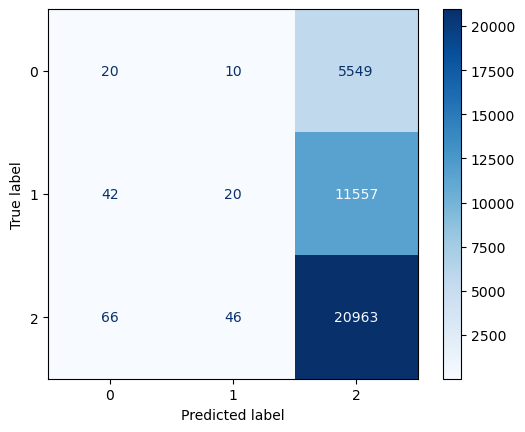

In [24]:
# All etfs, without normalization, removed 2008 outliers
y_test, y_pred, y_pred_proba, accuracy, coef, selector = logreg_predict_dir7(df, 3)
print("accuracy = ", accuracy)
print("coef = ", coef)
print("selector ranking = ", selector.ranking_)
print("cnf_matrix = \n", metrics.confusion_matrix(y_test, y_pred))
print("y_pred_proba = ", y_pred_proba)

Mean Accuracy: 0.456 (0.001)
5.286864995956421 seconds
accuracy =  0.5487680610351945
coef =  [[-2.55204919e-13 -2.55884371e-13 -1.19487024e-15 -2.56707491e-13
  -2.54360977e-13 -2.55534234e-13  9.91635990e-10 -2.55509709e-13
  -1.84389528e-15 -7.28222920e-15 -1.28093559e-10 -2.64104762e-15
  -8.65408673e-17 -2.54939275e-13 -3.87298907e-15 -1.71646789e-14
  -1.20227333e-10 -3.03630202e-15  6.91076879e-17 -2.59129150e-13
  -2.78549098e-13 -6.02131074e-16]
 [-6.80258803e-14 -6.83878469e-14 -6.58679642e-16 -6.88011514e-14
  -6.74878733e-14 -6.81445123e-14  2.05553604e-10 -6.87356330e-14
  -1.21711537e-15 -4.91664486e-15 -1.25097784e-10 -1.35872998e-16
  -2.11328924e-16 -7.02996586e-14 -1.68547674e-15 -7.78155754e-15
   1.79292786e-11  3.49147568e-16 -1.13885106e-16 -3.54817541e-14
  -1.86337645e-14  8.80566480e-16]
 [ 3.23230799e-13  3.24272218e-13  1.85354988e-15  3.25508643e-13
   3.21848851e-13  3.23678747e-13 -1.19718959e-09  3.24245342e-13
   3.06101065e-15  1.21988741e-14  2.5319134

/Users/yeyutong/miniforge3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


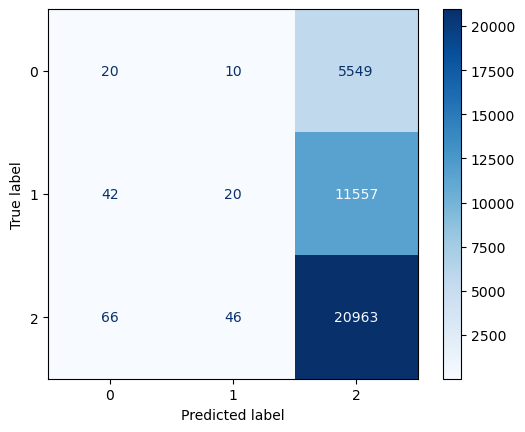

In [25]:
# All etfs, without normalization, removed 2008 outliers
y_test, y_pred, y_pred_proba, accuracy, coef, selector = logreg_predict_dir7(df, 22)
print("accuracy = ", accuracy)
print("coef = ", coef)
print("selector ranking = ", selector.ranking_)
print("cnf_matrix = \n", metrics.confusion_matrix(y_test, y_pred))
print("y_pred_proba = ", y_pred_proba)

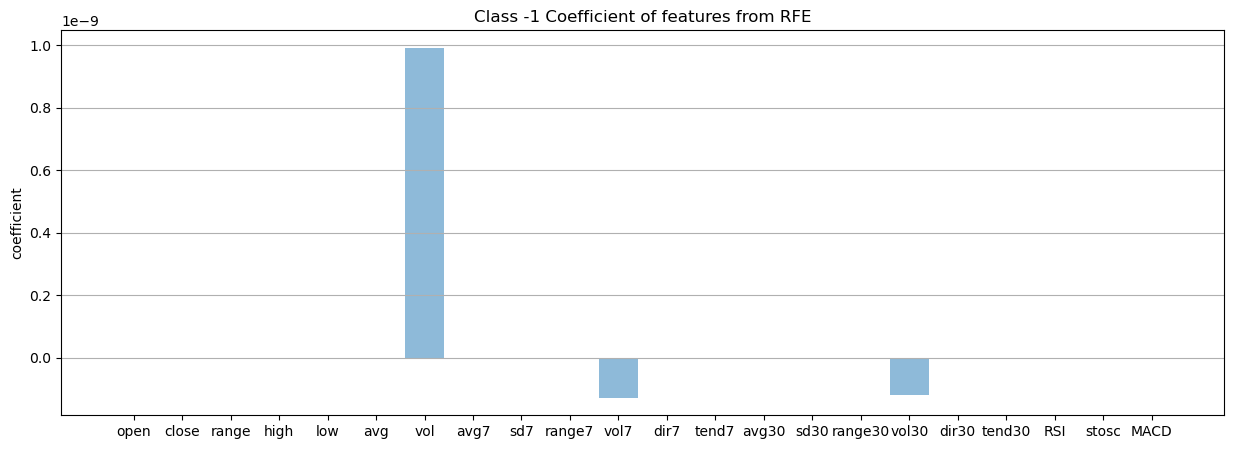

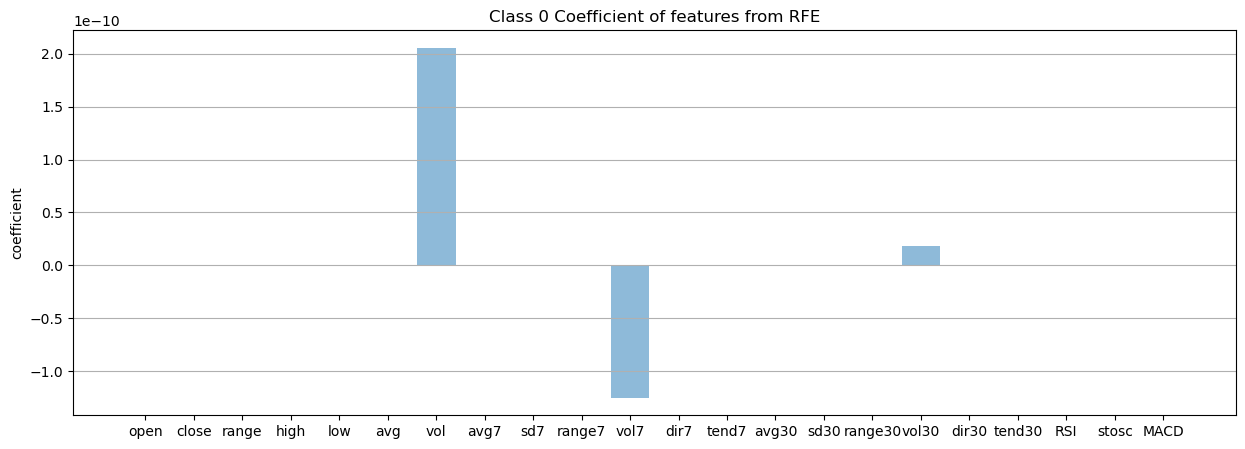

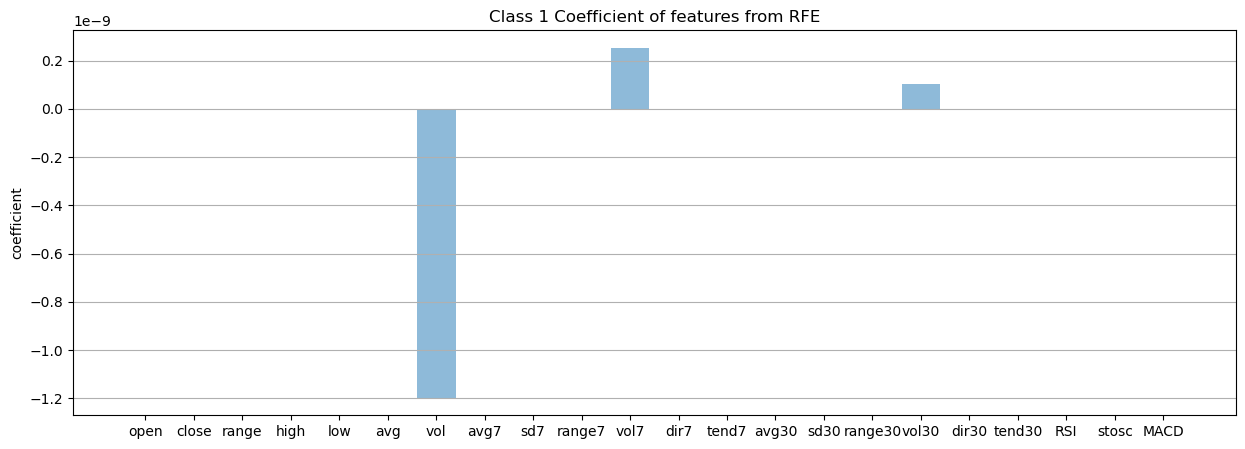

In [26]:
# Create arrays for the plot
features = ['open', 'close', 'range', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'tend30', 'RSI', 'stosc', 'MACD']
x_pos = np.arange(22)

# Taken from logreg model
coef = [[-2.55204919e-13, -2.55884371e-13, -1.19487024e-15, -2.56707491e-13,
  -2.54360977e-13, -2.55534234e-13,  9.91635990e-10, -2.55509709e-13,
  -1.84389528e-15, -7.28222920e-15, -1.28093559e-10, -2.64104762e-15,
  -8.65408673e-17, -2.54939275e-13, -3.87298907e-15, -1.71646789e-14,
  -1.20227333e-10, -3.03630202e-15,  6.91076879e-17, -2.59129150e-13,
  -2.78549098e-13, -6.02131074e-16],
 [-6.80258803e-14, -6.83878469e-14, -6.58679642e-16, -6.88011514e-14,
  -6.74878733e-14, -6.81445123e-14,  2.05553604e-10, -6.87356330e-14,
  -1.21711537e-15, -4.91664486e-15, -1.25097784e-10, -1.35872998e-16,
  -2.11328924e-16, -7.02996586e-14, -1.68547674e-15, -7.78155754e-15,
   1.79292786e-11,  3.49147568e-16, -1.13885106e-16, -3.54817541e-14,
  -1.86337645e-14,  8.80566480e-16],
 [ 3.23230799e-13,  3.24272218e-13,  1.85354988e-15,  3.25508643e-13,
   3.21848851e-13,  3.23678747e-13, -1.19718959e-09,  3.24245342e-13,
   3.06101065e-15,  1.21988741e-14,  2.53191343e-10,  2.77692062e-15,
   2.97869791e-16,  3.25238934e-13,  5.55846580e-15,  2.49462364e-14,
   1.02298055e-10,  2.68715445e-15,  4.47774184e-17,  2.94610904e-13,
   2.97182863e-13, -2.78435406e-16]]

fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(x_pos, coef[0], align='center', alpha=0.5)
ax.set_ylabel('coefficient')
ax.set_xticks(x_pos)
ax.set_xticklabels(features)
ax.set_title('Class -1 Coefficient of features from RFE')
ax.yaxis.grid(True)

fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(x_pos, coef[1], align='center', alpha=0.5)
ax.set_ylabel('coefficient')
ax.set_xticks(x_pos)
ax.set_xticklabels(features)
ax.set_title('Class 0 Coefficient of features from RFE')
ax.yaxis.grid(True)

fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(x_pos, coef[2], align='center', alpha=0.5)
ax.set_ylabel('coefficient')
ax.set_xticks(x_pos)
ax.set_xticklabels(features)
ax.set_title('Class 1 Coefficient of features from RFE')
ax.yaxis.grid(True)

### Compare results of other implementations

accuracy =  0.487698986975398
coef =  [2.795923693082427e-07, 2.712255833391057e-07, 7.020347072840256e-10, 2.750987915345108e-07, 2.7267604180568844e-07, 2.738874166701062e-07, 0.055123391827022715, 2.6104393548421215e-07, 1.7113561182706597e-09, 8.368923354573245e-09, -0.41900067185840684, 4.900087127282444e-10, -6.0636212883153035e-09, 2.460453930695027e-07, -6.523315080922081e-09, -2.1786098231553472e-08, 0.08774389589564356, -4.790949138795177e-09, -4.074611767568581e-10, -4.202250014983588e-07, 1.554774870627199e-07, 1.6852525980030706e-09]
selector ranking =  [1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
cnf_matrix = 
 [[  0   0 201]
 [  0   0 153]
 [  0   0 337]]


/Users/yeyutong/miniforge3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


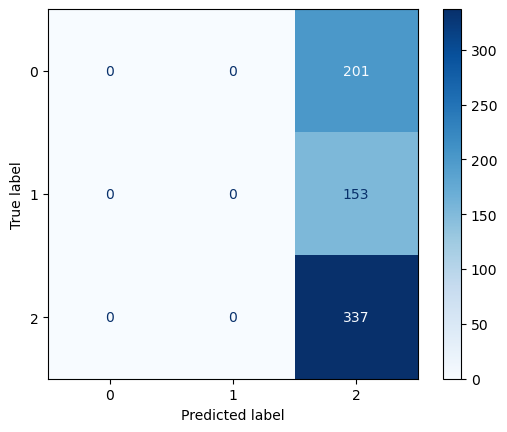

In [27]:
#By each etf, with normalization
y_test, y_pred, y_pred_proba, accuracy, coef, selector = logreg_predict_dir1(df, 'spy', 22)
print("accuracy = ", accuracy)
print("coef = ", coef)
print("selector ranking = ", selector.ranking_)
print("cnf_matrix = \n", metrics.confusion_matrix(y_test, y_pred))

accuracy =  0.487698986975398
coef =  [0.05512339184562131, -0.4190006718698406, 0.08774389590864669]
selector ranking =  [1 1 2]
cnf_matrix = 
 [[  0   0 201]
 [  0   0 153]
 [  0   0 337]]


/Users/yeyutong/miniforge3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


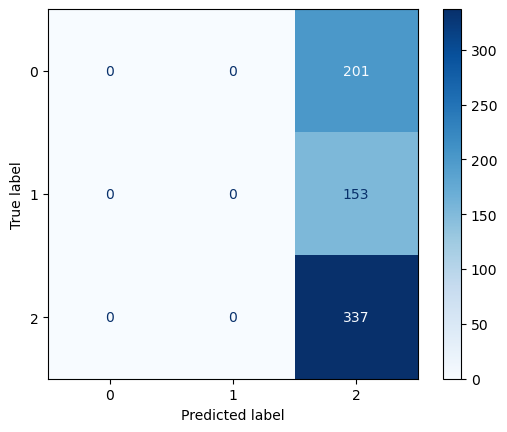

In [28]:
#By each etf, with normalization, feature selection
y_test, y_pred, y_pred_proba, accuracy, coef, selector = logreg_predict_dir1(df, 'spy', 3)
print("accuracy = ", accuracy)
print("coef = ", coef)
print("selector ranking = ", selector.ranking_)
print("cnf_matrix = \n", metrics.confusion_matrix(y_test, y_pred))

/Users/yeyutong/miniforge3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy =  0.6461187214611872
coef =  [2.795923693082427e-07, 2.712255833391057e-07, 7.020347072840256e-10, 2.750987915345108e-07, 2.7267604180568844e-07, 2.738874166701062e-07, 0.055123391827022715, 2.6104393548421215e-07, 1.7113561182706597e-09, 8.368923354573245e-09, -0.41900067185840684, 4.900087127282444e-10, -6.0636212883153035e-09, 2.460453930695027e-07, -6.523315080922081e-09, -2.1786098231553472e-08, 0.08774389589564356, -4.790949138795177e-09, -4.074611767568581e-10, -4.202250014983588e-07, 1.554774870627199e-07, 1.6852525980030706e-09]
selector ranking =  [1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
cnf_matrix = 
 [[  0   0  57]
 [  0   0  98]
 [  0   0 283]]


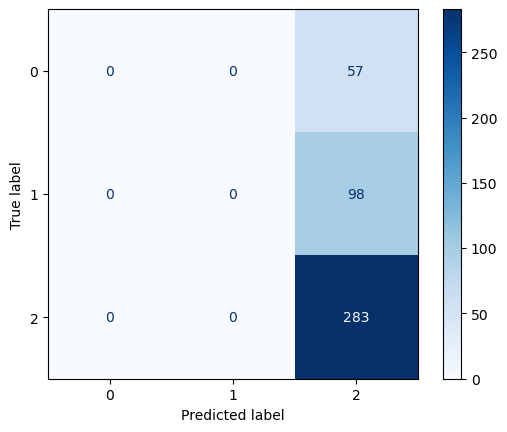

In [29]:
#By each etf, with normalization, removed 2008 outliers
y_test, y_pred, y_pred_proba, accuracy, coef, selector = logreg_predict_dir2(df, 'spy', 22)
print("accuracy = ", accuracy)
print("coef = ", coef)
print("selector ranking = ", selector.ranking_)
print("cnf_matrix = \n", metrics.confusion_matrix(y_test, y_pred))

accuracy =  0.6461187214611872
coef =  [0.05512339184562131, -0.4190006718698406, 0.08774389590864669]
selector ranking =  [1 1 2]
cnf_matrix = 
 [[  0   0  57]
 [  0   0  98]
 [  0   0 283]]


/Users/yeyutong/miniforge3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


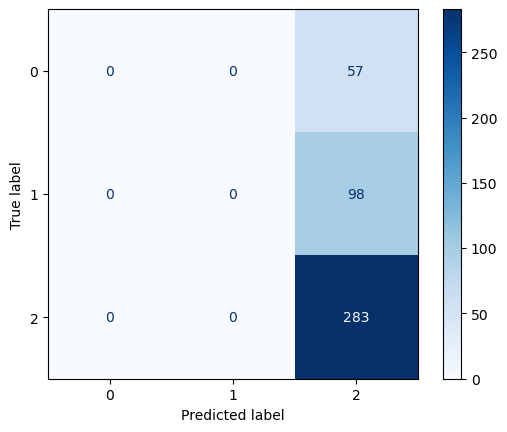

In [30]:
#By each etf, with normalization, feature selection, removed 2008 outliers
y_test, y_pred, y_pred_proba, accuracy, coef, selector = logreg_predict_dir2(df, 'spy', 3)
print("accuracy = ", accuracy)
print("coef = ", coef)
print("selector ranking = ", selector.ranking_)
print("cnf_matrix = \n", metrics.confusion_matrix(y_test, y_pred))

train set dirNext30 -1:  424
train set dirNext30 0:  712
train set dirNext30 1:  1062
train set dirNext30 -1 after oversampling:  1062
train set dirNext30 0 after oversampling:  1062
train set dirNext30 1 after oversampling:  1062
test set dirNext30 -1:  111
test set dirNext30 0:  185
test set dirNext30 1:  396
test set dirNext30 -1 after oversampling:  396
test set dirNext30 0 after oversampling:  396
test set dirNext30 1 after oversampling:  396
accuracy =  0.3333333333333333
coef =  [-2.350073419183738e-06, -2.3626901275675287e-06, -4.299346530241741e-09, -2.361527588618871e-06, -2.3528419568659704e-06, -2.3571847727424836e-06, 0.24409900574347126, -2.3579547166752125e-06, -8.362723726179672e-09, -3.024032422359894e-08, 0.44994243667561823, -1.042495645894008e-08, -1.0309917976430253e-09, -2.339637475865161e-06, -2.522105765967542e-08, -9.384740639095048e-08, -0.1789705041649181, -1.6201789694703946e-08, 2.4245004069583035e-09, -1.2213477398832425e-06, -1.0595126310421947e-06, -1.48

/Users/yeyutong/miniforge3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


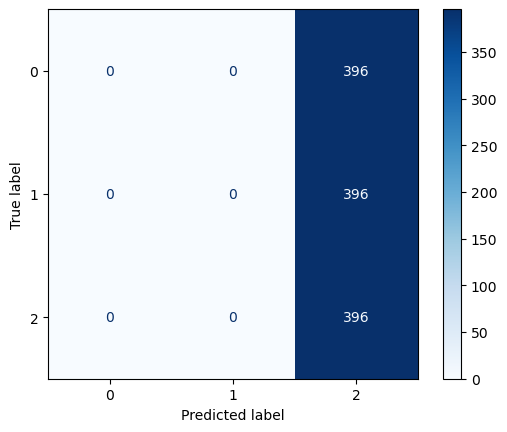

In [31]:
#By each etf, with normalization, removed 2008 outliers, oversampling
y_test, y_pred, y_pred_proba, accuracy, coef, selector = logreg_predict_dir3(df, 'spy', 22)
print("accuracy = ", accuracy)
print("coef = ", coef)
print("selector ranking = ", selector.ranking_)
print("cnf_matrix = \n", metrics.confusion_matrix(y_test, y_pred))

accuracy =  0.4771689497716895
coef =  [-1.4924320806197178e-07, -1.8670945622788582e-07, 6.34015506135611e-09, -1.6564275773296174e-07, -1.730258560191013e-07, -1.693343068760288e-07, 0.49844090391303897, -1.629165116277873e-07, -7.791875012882239e-10, 6.616361841293521e-09, 0.8795795692890699, -7.176730924388949e-09, -2.056475304100102e-09, -1.5372096100861787e-07, -7.145841947116946e-09, -7.759339376184116e-09, -0.3089112925010452, -5.830681827633094e-09, 6.680450223997644e-10, -5.500287552182119e-07, -8.544826738608612e-07, -1.3133632129087999e-08]
selector ranking =  [1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1]
cnf_matrix = 
 [[  0   0  92]
 [  0   0 137]
 [  0   0 209]]


/Users/yeyutong/miniforge3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


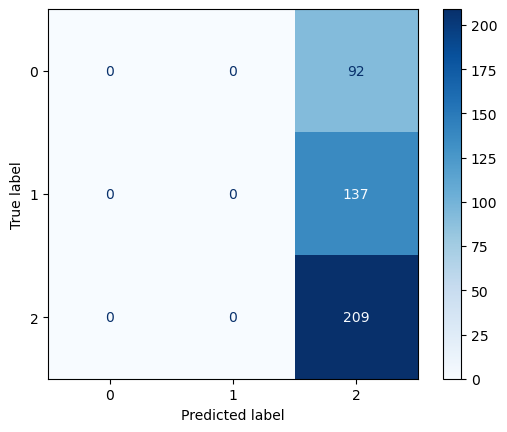

In [32]:
#By each etf, with normalization, removed 2008 outliers, oversampling, direNext7 as label
y_test, y_pred, y_pred_proba, accuracy, coef, selector = logreg_predict_dir4(df, 'spy', 22)
print("accuracy = ", accuracy)
print("coef = ", coef)
print("selector ranking = ", selector.ranking_)
print("cnf_matrix = \n", metrics.confusion_matrix(y_test, y_pred))

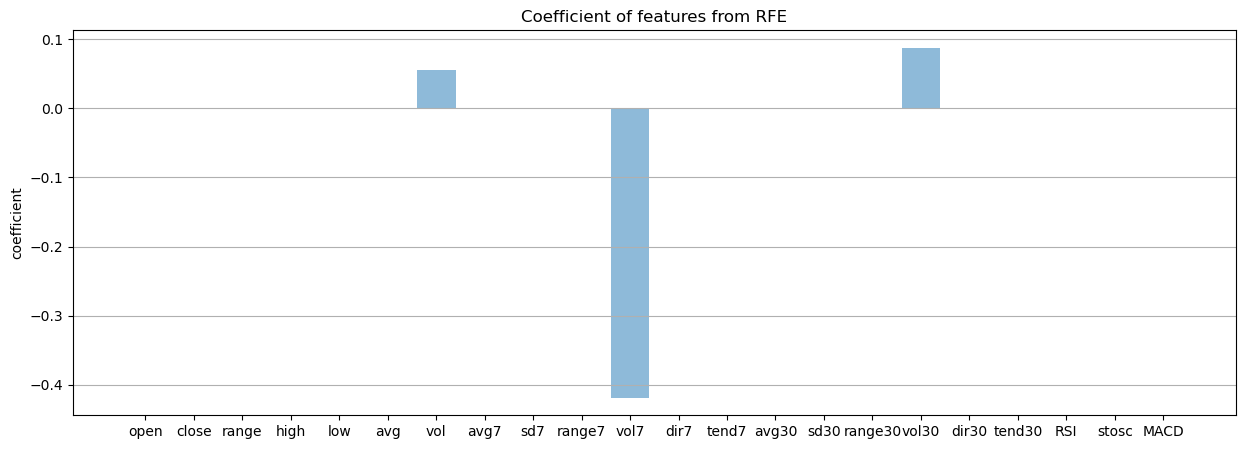

In [33]:
# Create arrays for the plot
features = ['open', 'close', 'range', 'high', 'low', 'avg', 'vol', 'avg7', 'sd7', 'range7', 'vol7', 'dir7', 'tend7', 'avg30', 'sd30', 'range30', 'vol30', 'dir30', 'tend30', 'RSI', 'stosc', 'MACD']
x_pos = np.arange(22)
coef = [2.795923693082427e-07, 2.712255833391057e-07, 7.020347072840256e-10, 2.750987915345108e-07, 2.7267604180568844e-07, 2.738874166701062e-07, 0.055123391827022715, 2.6104393548421215e-07, 1.7113561182706597e-09, 8.368923354573245e-09, -0.41900067185840684, 4.900087127282444e-10, -6.0636212883153035e-09, 2.460453930695027e-07, -6.523315080922081e-09, -2.1786098231553472e-08, 0.08774389589564356, -4.790949138795177e-09, -4.074611767568581e-10, -4.202250014983588e-07, 1.554774870627199e-07, 1.6852525980030706e-09]

fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(x_pos, coef, align='center', alpha=0.5)
ax.set_ylabel('coefficient')
ax.set_xticks(x_pos)
ax.set_xticklabels(features)
ax.set_title('Coefficient of features from RFE')
ax.yaxis.grid(True)

train set dirNext30 -1:  37136
train set dirNext30 0:  51034
train set dirNext30 1:  74263
train set dirNext30 -1 after oversampling:  74263
train set dirNext30 0 after oversampling:  74263
train set dirNext30 1 after oversampling:  74263
test set dirNext30 -1:  5579
test set dirNext30 0:  11619
test set dirNext30 1:  21075
test set dirNext30 -1 after oversampling:  21075
test set dirNext30 0 after oversampling:  21075
test set dirNext30 1 after oversampling:  21075
Mean Accuracy: 0.338 (0.003)
accuracy =  0.33894820086990907
coef =  [[ 6.17654550e-10  4.33648278e-11 -2.62663074e-11]
 [ 1.47374517e-10 -1.13982439e-10  1.16524009e-11]
 [-7.65029068e-10  7.06176111e-11  1.46139066e-11]]
selector ranking =  [1 1 2]
cnf_matrix = 
 [[ 7306    47 13722]
 [ 6642    74 14359]
 [ 6980    45 14050]]


/Users/yeyutong/miniforge3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


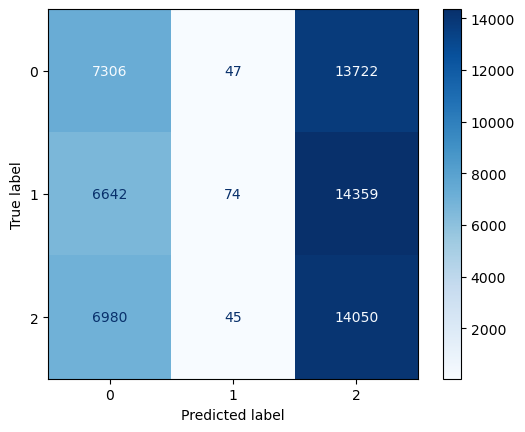

In [34]:
# All etfs, without normalization, removed 2008 outliers, oversampling
y_test, y_pred, y_pred_proba, accuracy, coef, selector = logreg_predict_dir8(df, 3)
print("accuracy = ", accuracy)
print("coef = ", coef)
print("selector ranking = ", selector.ranking_)
print("cnf_matrix = \n", metrics.confusion_matrix(y_test, y_pred))